In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 13:00:41,947] A new study created in memory with name: no-name-0ac532b6-8921-4534-ad66-0c58b35ee1c5
[I 2025-04-27 13:01:34,715] Trial 0 finished with value: 0.9604426559356136 and parameters: {'n_estimators': 7404, 'max_depth': 11, 'learning_rate': 0.007997020562698246, 'subsample': 0.8971488825819014, 'colsample_bytree': 0.5314385864187265, 'gamma': 3.1704401911812647, 'reg_alpha': 0.004225209971098367, 'reg_lambda': 0.00017749128720353173}. Best is trial 0 with value: 0.9604426559356136.
[I 2025-04-27 13:01:47,830] Trial 1 finished with value: 0.9575855130784708 and parameters: {'n_estimators': 545, 'max_depth': 12, 'learning_rate': 0.0028048940741387833, 'subsample': 0.9491845600015103, 'colsample_bytree': 0.7093773931156733, 'gamma': 0.6549819636779369, 'reg_alpha': 6.508806042396308e-08, 'reg_lambda': 0.01873969356552858}. Best is trial 0 with value: 0.9604426559356136.
[I 2025-04-27 13:02:03,905] Trial 2 finished with value: 0.9491348088531186 and parameters: {'n_es

Best trial:
Accuracy: 0.971830985915493
Best hyperparameters:  {'n_estimators': 3993, 'max_depth': 10, 'learning_rate': 0.09141450554013122, 'subsample': 0.5125276077123201, 'colsample_bytree': 0.8484319655837099, 'gamma': 2.884530382369892, 'reg_alpha': 0.013942541096395518, 'reg_lambda': 1.3202391807378544e-08}


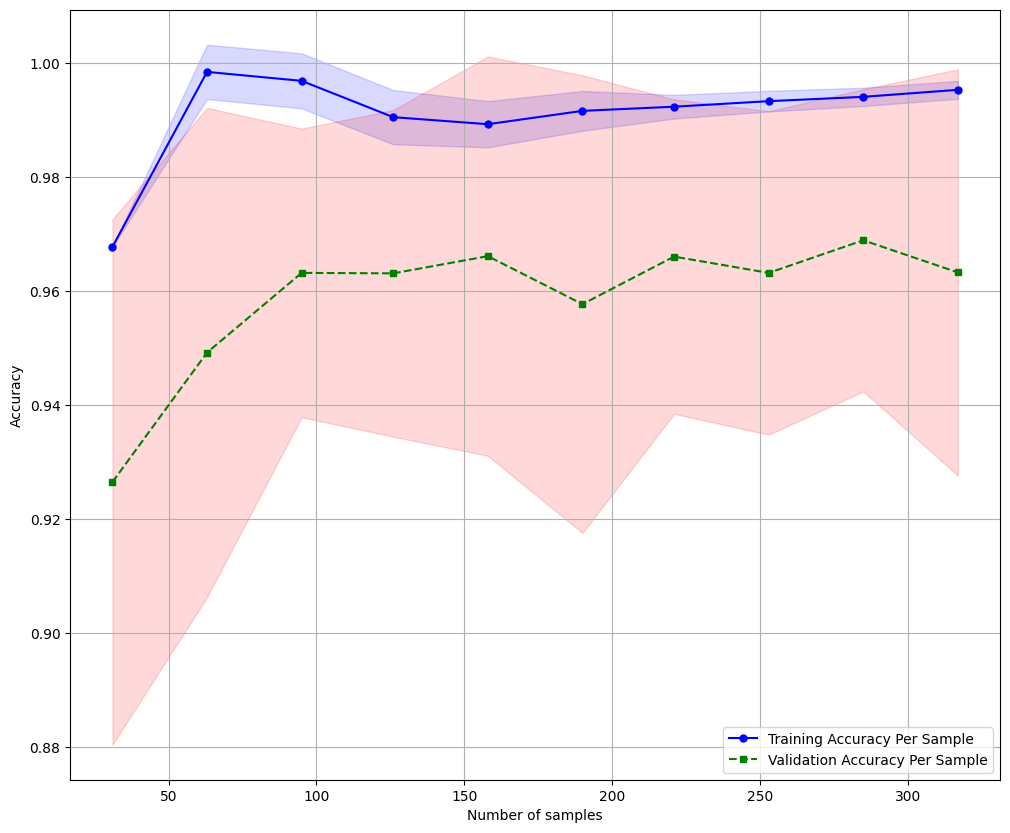

Confusion Matrix
[[ 59   5]
 [  2 105]]
Accuracy: 0.9591, Precision: 0.9545, Recall: 0.9813, F1: 0.9677, AUC: 0.9946


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)

df_train = X_train.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

helper.train_and_evaluate_model('xgb', df_train_outlier_removed.iloc[:,:-1], X_test, df_train_outlier_removed.iloc[:,-1], y_test)